# MOMENTUM TRADING STRATEGY BACKTEST

In this project we will create and backtest a simple trading strategy, we will allocate our funds following a simple principle: we will open long position on the top performing stocks of the last week and open short position on the worst performing ones.

What's the correct number of stocks to buy and how many short position do we need to open? What's the correct percentage of funds to dedicate for long positions etc? 
Right now we do not have the right answer for this question, that's why we will backtest plenty of possible combinations.  

## Libraries

In [2]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import wikipedia as wp
import warnings
warnings.filterwarnings("ignore")

Downloading from Wikipedia all SP500 Tickers

In [3]:
html = wp.page("List_of_S%26P_500_companies").html().encode("UTF-8")
sp500_tickers = (pd.read_html(html)[0])['Symbol'].drop_duplicates()

In [4]:
print(sp500_tickers)

0       MMM
1       AOS
2       ABT
3      ABBV
4       ACN
       ... 
498     YUM
499    ZBRA
500     ZBH
501    ZION
502     ZTS
Name: Symbol, Length: 503, dtype: object


In [5]:
# Empty dataframe to fill with the data downloaded Yahoo Finance

df = pd.DataFrame()

# For cycle to fill the dataframe with data for each ticker 

start_date = "2021-01-01"

for t in sp500_tickers:
    try: df[t] = yf.download(t, start=start_date, interval="1wk", progress=False)['Adj Close']
    except: pass

Got error from yahoo api for ticker BRK.B, Error: {'code': 'Not Found', 'description': 'No data found, symbol may be delisted'}

1 Failed download:
- BRK.B: No data found for this date range, symbol may be delisted

1 Failed download:
- BF.B: No data found for this date range, symbol may be delisted


In [10]:
df.head()

,Date,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
0,2021-01-01,153.413269,54.331161,106.267792,95.144791,253.523209,88.710617,49.668446,477.739990,160.757812,...,198.233582,386.944672,109.501205,60.664558,105.395546,100.962379,409.100006,151.849701,46.258583,164.136169
1,2021-01-08,150.421280,54.895218,105.064751,99.531578,245.624634,89.027191,50.085270,463.269989,154.150421,...,198.475082,370.877197,108.752907,59.174934,102.529411,103.046631,411.980011,155.014450,47.119164,158.199768
2,2021-01-15,154.271973,55.487957,108.277641,100.361923,249.305618,93.587868,50.009487,472.019989,153.312576,...,201.440125,378.373993,108.912544,60.617996,100.207375,103.142250,406.200012,155.338531,43.852654,161.639755
3,2021-01-22,165.796967,54.407642,115.409882,94.002480,240.993484,89.304192,48.323235,465.670013,158.758438,...,199.257385,359.762512,101.818665,59.249409,96.272522,98.027206,393.029999,149.685883,41.798363,154.084137
4,2021-01-29,160.084183,56.336956,114.786758,97.899338,244.540634,91.688408,49.753708,489.380005,162.385864,...,202.145157,359.849548,108.443611,59.202866,94.407120,98.467003,407.339996,153.212845,44.620701,154.674744


We don't need the date as an index, so we are going to reset and drop the index

In [6]:
df = df.reset_index()

In [8]:
df2 = df.drop('Date', axis=1).pct_change().drop(0, axis=0)

In [9]:
df2.head()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
1,-0.019503,0.010382,-0.011321,0.046106,-0.031155,0.003569,0.008392,-0.030288,-0.041102,0.006918,...,0.001218,-0.041524,-0.006834,-0.024555,-0.027194,0.020644,0.007040,0.020841,0.018604,-0.036168
2,0.025599,0.010798,0.030580,0.008343,0.014986,0.051228,-0.001513,0.018887,-0.005435,-0.012735,...,0.014939,0.020214,0.001468,0.024386,-0.022648,0.000928,-0.014030,0.002091,-0.069324,0.021745
3,0.074706,-0.019469,0.065870,-0.063365,-0.033341,-0.045772,-0.033719,-0.013453,0.035521,-0.080034,...,-0.010836,-0.049188,-0.065134,-0.022577,-0.039267,-0.049592,-0.032422,-0.036389,-0.046845,-0.046744
4,-0.034457,0.035460,-0.005399,0.041455,0.014719,0.026698,0.029602,0.050916,0.022849,0.033520,...,0.014493,0.000242,0.065066,-0.000786,-0.019376,0.004486,0.036409,0.023562,0.067523,0.003833
5,0.000621,0.041780,0.059295,-0.044043,0.023556,0.113940,0.045697,0.014794,-0.022045,-0.025366,...,0.091639,0.005779,0.054191,-0.031766,0.018215,0.024177,0.154024,0.009208,0.014309,0.046522


In [11]:
df2 =  df2[df2['MMM'] != 0]

In [12]:
df2.tail()

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
128,-0.032559,-0.020848,0.030756,0.011186,-0.051024,0.010436,-0.020118,-0.027154,-0.002580,-0.027750,...,0.011733,-0.010701,0.007172,-0.016150,-0.008029,-0.020546,-0.058478,0.014027,-0.069358,-0.007408
129,-0.011849,0.048378,-0.005450,-0.030420,0.003515,0.009478,0.021352,0.012961,-0.017877,0.003825,...,-0.012107,0.063009,-0.007786,-0.023423,-0.009695,0.006748,0.077526,0.003942,0.011494,0.010049
130,-0.029524,-0.024592,-0.004273,0.030173,-0.001168,-0.004574,0.032431,-0.005126,0.023977,0.025355,...,-0.001988,-0.004359,-0.047560,0.040300,-0.016167,-0.024479,0.008522,-0.025596,0.018328,-0.019782
131,0.068010,0.035269,0.005037,-0.026667,0.023509,0.082709,0.027648,0.074778,0.024859,0.010006,...,0.001773,-0.022237,0.101577,0.008940,0.011046,0.015310,0.093872,0.013527,0.151908,0.015018
132,-0.005444,0.018060,0.006568,0.029402,0.005412,0.005919,-0.012252,-0.004736,0.010169,0.003262,...,-0.007727,0.002337,-0.001186,-0.000933,-0.011738,-0.002869,-0.028857,-0.005171,-0.040625,0.006959


We are now declaring a few functions that will be useful when calculating profit of each strategy and allocation combination 

In [13]:
def adjust_trade_df(df_5):

    for i in range(len(df_5)):
        if df_5['Position'][i] == 'Short':
            df_5['Profit'][i] = df_5['Profit'][i] * -1
    
    return df_5['Profit']

In [14]:
def Back_test(top_performer_n,worst_performer_n,allocation1,allocation2,df,df2):
    
    profits = []
    
    for i in range(len(df2)-1):
    
        df_temp = df2.loc[i:i+2].reset_index(drop=True)
        y = df_temp.loc[1].dropna().reset_index(drop=False)
        y = y.rename(columns={"index":"Ticker", 1:"Change"})
        x = df_temp.loc[0].reset_index(drop=False)
        x = x.rename(columns={"index":"Ticker", 0:"Change"})
        x = x.sort_values('Change', ascending=False).dropna().reset_index(drop=True)

        top_performer = x.head(top_performer_n)
        worst_performer = x.tail(worst_performer_n)

        all_stocks_ticker = []
        operations = []

        for i in range(max(len(top_performer),len(worst_performer))):
        
            try: 
                ref = top_performer.iloc[i]
                all_stocks_ticker += [ref['Ticker']]
                operations += ["Long"]
            except: pass

            try:
                ref2 = worst_performer.iloc[i]
                all_stocks_ticker += [ref2['Ticker']]
                operations += ['Short']
            except: pass

        y = y[y['Ticker'].isin(all_stocks_ticker)].reset_index(drop=True)
        y['Operation'] = operations

        weights = []
        tickers_y = []
        operation_tpye = []
        pct_changes = []

        long_allocation = allocation1
        short_allocation = allocation2
        numero_asset_long = len(y[y['Operation'] == 'Long'])
        numero_asset_short = len(y[y['Operation'] == 'Short'])

        for i in range(len(y)):

            if y['Operation'][i] == "Long":
                weights.append(long_allocation / numero_asset_long)

            if y['Operation'][i] == "Short":
                weights.append(short_allocation / numero_asset_short)

            pct_changes.append(y['Change'][i])
            tickers_y.append(y['Ticker'][i])
            operation_tpye.append(y['Operation'][i])

        df_trades = pd.DataFrame(list(zip(weights, tickers_y, operation_tpye,pct_changes)), columns=['Percentage', 'Ticker', 'Position', 'Result'])
        df_trades['Profit'] = df_trades['Percentage'] * df_trades['Result']
        df_long = df_trades[df_trades['Position'] == 'Long']
        df_short = df_trades[df_trades['Position'] == 'Short']
        df_short['Profit'] = df_short['Profit'] * -1

        total_profit = df_short['Profit'].sum() + df_long['Profit'].sum()
        profits.append(total_profit)

    return profits

Now we will start backtesting the strategy. We are first creating a list, named "possible_allocation_combinations" which contains all possible combinations for weights of long and short positions. 

example: 
* 90% Long Positions, 10% Short Positions
* 80% Long Positions, 20% Short Positions
* 70% Long Positions, 30% Short Positions

and also the number of stocks to buy and the number of stocks to sell.
example: 

* 1 Stock to long - 1 Stock to short
* 2 Stocks to long - 1 Stock to short
* 2 Stocks to long - 2 Stocks to short

and so on...


This may take a while since it's computing many operations 

In [16]:
possible_allocation_combinations = list(zip([round((i*0.10),2) for i in range(1,10)],[round((1 - i*0.10),2) for i in range(1,10)]))

profits_list = []

for n1 in range(1,11):
    for n2 in range(1,11):
        for allocation1,allocation2 in possible_allocation_combinations:
            profits_ = Back_test(n1,n2,allocation1,allocation2,df,df2)
            profits_list += [profits_]

We obtained percentage returns for each strategy during each week in the period of backtesting. Now we are going to simulate multiple portfolios, each one running a different strategy. Later, we will analyze their performance.

In [17]:
ptf_value = 100
all_balance_history = []

for i in range(len(profits_list)):
    
    ptf_value = 100
    balance_history = []

    for p in profits_list[i]: 
        ptf_value += ptf_value * p
        balance_history.append(ptf_value)

    all_balance_history.append(balance_history)

Let's plot a graph containing all portfolios' performance

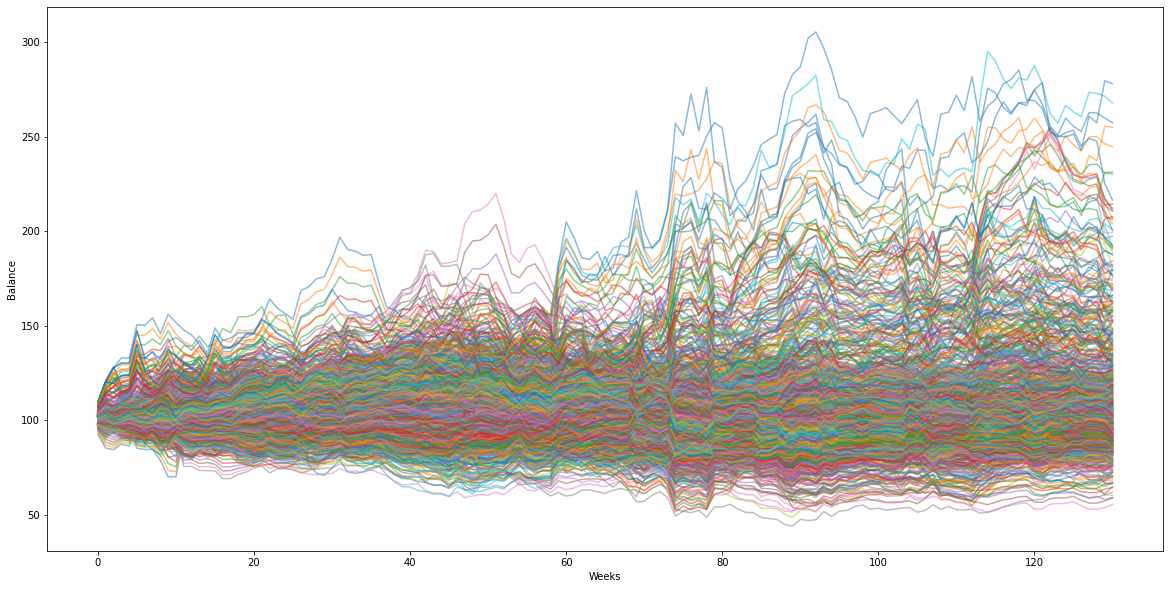

In [78]:
plt.figure(figsize=(20, 10))
for i in range(len(all_balance_history)):
    plt.plot([i for i in range(len(all_balance_history[i]))], all_balance_history[i], alpha=0.50)
    
plt.xlabel("Weeks")
plt.ylabel("Balance")
plt.show()

Now we will compute final profit and outcome of each strategy and then visualize only the top performing ones.

In [21]:
count = 0 
strategies = []
results = []

for n1 in range(1,11):
    for n2 in range(1,11):
        for allocation1,allocation2 in possible_allocation_combinations:
            strategies.append(str(n1) + " " + str(n2) + " " + str(allocation1) + " " + str(allocation2))
            results.append(all_balance_history[count])
            count += 1

In [24]:
df_finale = pd.DataFrame(list(zip(strategies, results)), columns=['Strategy', "Result"])

def final_profit(arrays):

    final_profits = []

    for a in arrays:
        final_profits.append(a[len(a)-1])

    return final_profits

df_finale['Final Profit'] = final_profit(df_finale['Result'])

df_finale.head()

,Strategy,Result,Final Profit
0,1 1 0.1 0.9,"[97.91488378499261, 95.8732446662861, 97.55481...",127.886743
1,1 1 0.2 0.8,"[98.20014321993193, 96.43268128415144, 97.1740...",123.788644
2,1 1 0.3 0.7,"[98.48540265487125, 96.99374536092122, 96.7839...",117.818825
3,1 1 0.4 0.6,"[98.77066208981059, 97.55643689659546, 96.3843...",110.236693
4,1 1 0.5 0.5,"[99.0559215247499, 98.12075589117411, 95.97523...",101.363709


Now we will sort the dataframe to filter only for the top performing strategies

In [31]:
df_finale.sort_values('Result', ascending=False, inplace=True)
df_finale = df_finale.reset_index(drop=True)

df_finale.head(5)

,Strategy,Result,Final Profit
0,4 1 0.1 0.9,"[110.06240778696237, 121.13733607863594, 128.3...",278.143930
1,3 1 0.1 0.9,"[109.98578869029265, 120.96873713825705, 128.2...",172.247016
2,7 1 0.1 0.9,"[109.75630019000309, 120.46445431398072, 127.8...",164.742016
3,5 1 0.1 0.9,"[109.74782319847776, 120.44584696804333, 127.7...",179.691636
4,9 1 0.1 0.9,"[109.69640819476764, 120.33301970833085, 119.6...",176.267164


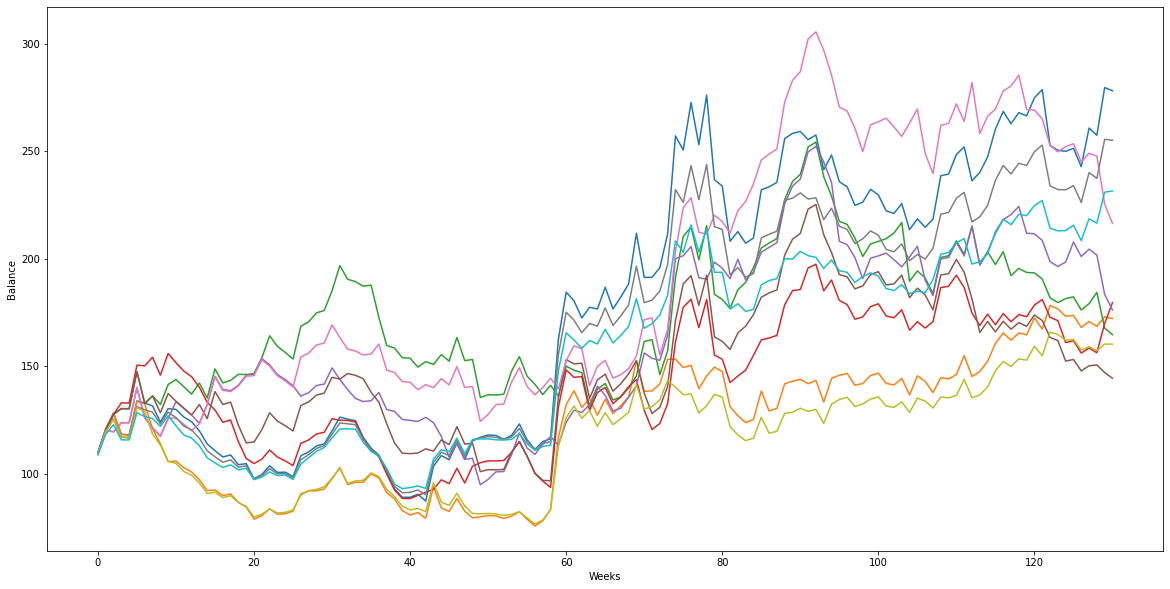

In [52]:
plt.figure(figsize=(20, 10))

for i in range(len(df_finale.loc[1:10])):
    plt.plot([i for i in range(len(df_finale['Result'][i]))], df_finale['Result'][i], alpha=1)

plt.xlabel("Weeks")
plt.ylabel("Balance")
plt.show()

## Now let's compare our strategy results with the SP500 Index performance to evaluate our trading strategy

Downloading SP500 price history

In [47]:
sp500_data = yf.download("^GSPC", start=start_date, interval="1wk", progress=False)['Adj Close']
sp500_data = sp500_data.reset_index(drop=True)

In [48]:
sp500_data.head()

0    3803.790039
1    3795.540039
2    3853.070068
3    3787.379883
4    3871.739990
Name: Adj Close, dtype: float64

Converting data into percentual changes

In [73]:
sp500_data = sp500_data.pct_change().fillna(0)

In [72]:
sp500_data.head()

0    0.000000
1   -0.002169
2    0.015157
3   -0.017049
4    0.022274
Name: Adj Close, dtype: float64

Let's see what would have happened if we had only bought the SP500

In [51]:
ptf_value = 100
sp500_balance_history = []

for p in sp500_data: 
    ptf_value += ptf_value * p
    sp500_balance_history.append(ptf_value)

print(sp500_balance_history)

[100.0, 99.783111057254, 101.29555072153828, 99.5685840679565, 101.7863749174921, 102.95993844543928, 102.89658289519527, 100.6716997669625, 99.0714506322205, 103.56355233690905, 102.93575409599956, 102.77959559762687, 105.68065208400031, 107.7128306189268, 109.63854153482303, 108.70684075632832, 110.71773603681159, 110.45878121661659, 108.11585176277468, 109.34147454186453, 110.43932077407383, 110.2282211846173, 111.44621896181371, 110.99087541440096, 112.16418862662941, 113.56935837791315, 113.59249011766387, 114.62330308406946, 114.81916550644272, 116.17754547338049, 116.43913181779799, 117.27329932291535, 115.82657716232356, 117.51437261510105, 119.2744643821272, 118.12638812902746, 117.61295849816742, 116.96176536508494, 113.24337029191445, 115.6677871397284, 116.6799355392097, 119.6117487672273, 120.83789785116163, 123.03676098135071, 122.22730413051757, 123.68032911253977, 123.59935518670869, 120.329988002817, 122.70525311283654, 122.73731919824017, 124.23898244991581, 125.63075

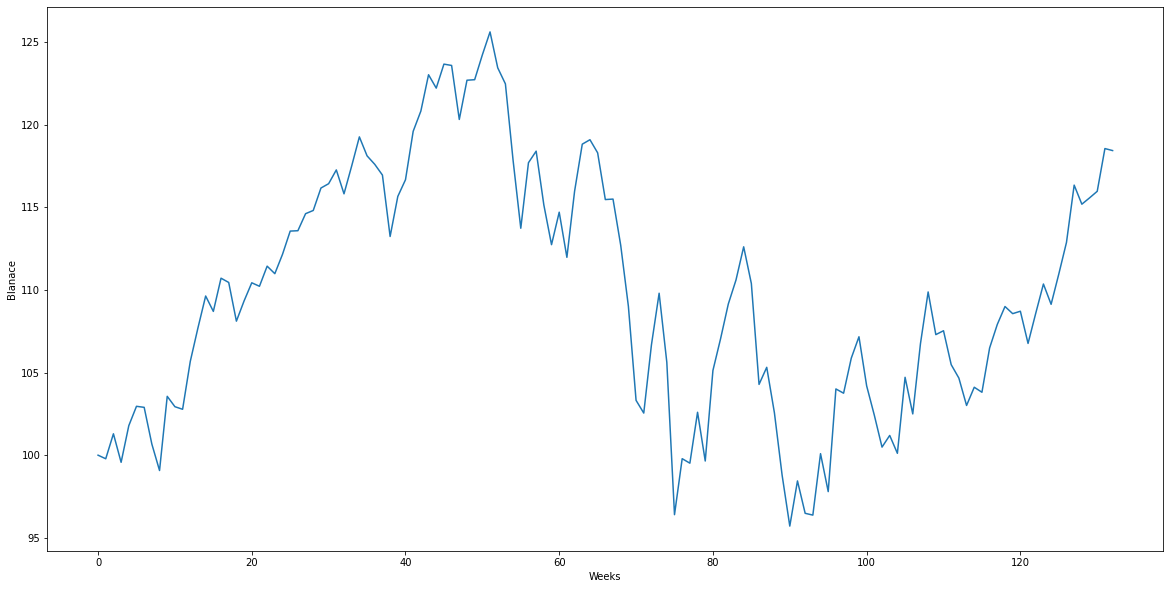

In [54]:
plt.figure(figsize=(20, 10))

plt.plot(sp500_balance_history)

plt.xlabel("Weeks")
plt.ylabel("Blanace")
plt.show()

Now let's compare the SP500 index performance to our top performing trading strategies

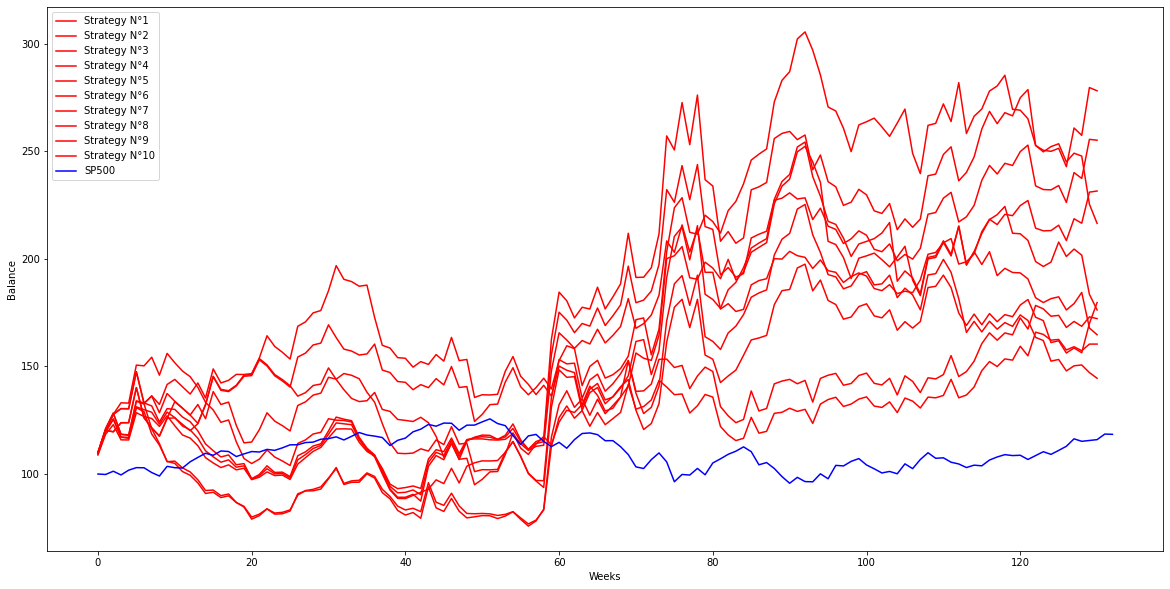

In [76]:
plt.figure(figsize=(20, 10))

for i in range(len(df_finale.loc[1:10])):
    plt.plot([i for i in range(len(df_finale['Result'][i]))], df_finale['Result'][i], color='Red', label=("Strategy N°"+ str(i+1)))

plt.plot(sp500_balance_history, color='Blue', label='SP500')

plt.xlabel("Weeks")
plt.ylabel("Balance")
plt.legend()
plt.show()

#### As we can see, each of our strategy outperformed the SP500, however at the cost of a wider volatily.